In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(theta, x):
    return np.dot(np.stack([np.ones(x.shape[0]), x, x**2], axis=1), theta)

In [31]:
l = 10 
theta = np.random.randint(low=-5, high=5, size=(3,))
print(theta)
x = np.random.randint(low=-5, high=5, size=(10,))
print(x)
y = f(theta, x)
print(y)

[ 0  4 -2]
[-2  3  1  2  4  3 -1 -5  1 -4]
[-16.  -6.   2.   0. -16.  -6.  -6. -70.   2. -48.]


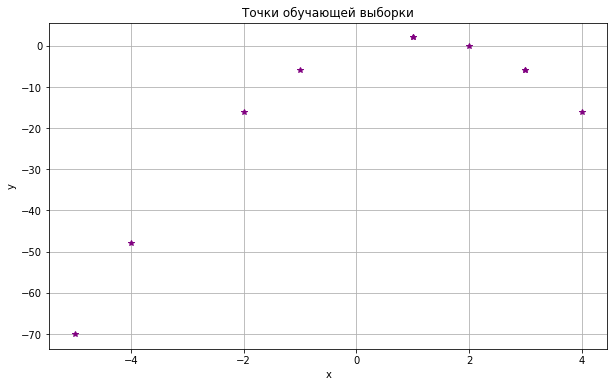

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, '*', color='purple', label='train')
ax.grid()
plt.title('Точки обучающей выборки')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [35]:
def L(theta, x, y):
    return np.sum((np.dot(np.stack([np.ones(l), x, x**2], axis=1), theta) - y) ** 2)


def gradL(theta, x, y):
    _x = np.stack([np.ones(l), x, x**2], axis=1)
    temp = 2 * (np.dot(_x, theta) - y)
    return np.dot(temp, _x)

In [264]:
def batch(theta, e=1e-6, lr=0.0001, n=10000):
    loss = [L(theta, x, y)]

    for i in range(n):
        theta -= lr * gradL(theta, x, y)
        loss.append(L(theta, x, y))
#         if loss[-1] < e:
#             print(f'step {i}', loss[-1])
#             break
        
    return theta, loss, n

In [265]:
theta_init = np.array([0.5, 1.5, 2.5])
theta, loss_batch, n = batch(theta_init, lr=0.00074)
steps_arr = list(range(len(loss_batch)))
print('Подобранные парметры theta: ', theta)

Подобранные парметры theta:  [ 4.42965452e-16  4.00000000e+00 -2.00000000e+00]


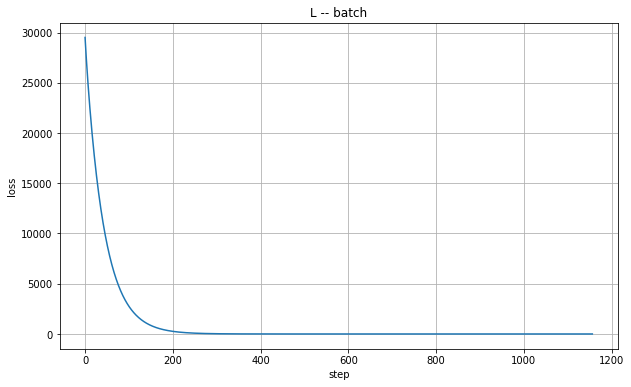

In [255]:
fig, axx = plt.subplots(figsize=(10,6))
axx.plot(steps_arr, loss_batch)
axx.grid()
plt.title('L -- batch')
axx.set_xlabel('step')
axx.set_ylabel('loss')
plt.show()

In [266]:
def NAG(theta, e=1e-6, gamma=0.9, lr=0.0001, n=1000):
    loss = [L(theta, x, y)]
    v_history = [np.array([0, 0, 0])]

    for i in range(n):
        v = gamma*v_history[-1] + lr*gradL(theta, x, y)
        theta -= v
        loss.append(L(theta, x, y))
        v_history.append(v)
#         if loss[-1] < e:
#             print(f'step {i}', loss[-1])
#             break
        
    return theta, loss, v_history, n

In [267]:
theta_init = np.array([0.5, 1.5, 2.5])
theta, loss_NAG, v_history, n = NAG(theta_init, gamma=0.945, lr=0.0001, n=1000)
steps_arr = list(range(len(loss_NAG)))
print('Подобранные парметры theta: ', theta)

Подобранные парметры theta:  [ 4.26575749e-12  4.00000000e+00 -2.00000000e+00]


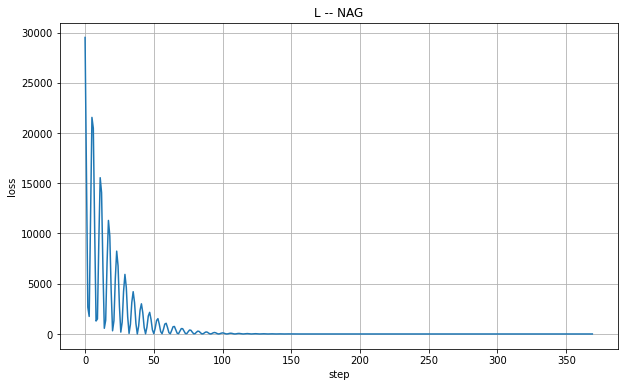

In [234]:
fig, axx = plt.subplots(figsize=(10,6))
axx.plot(steps_arr, loss_NAG)
axx.grid()
plt.title('L -- NAG')
axx.set_xlabel('step')
axx.set_ylabel('loss')
plt.show()